In [141]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
img = cv.imread('./test_images/lewis_hamilton(1).jpg')
img.shape

(594, 396, 3)

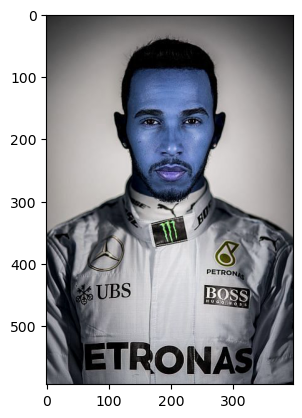

In [143]:
plt.imshow(img)

In [144]:
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_gray.shape

(594, 396)

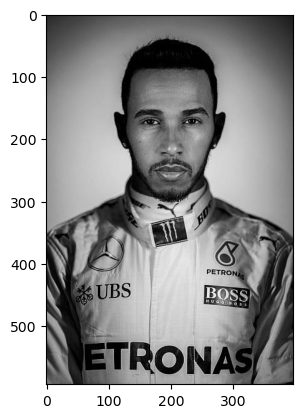

In [145]:
plt.imshow(img_gray,cmap='gray')

In [146]:
face_cascade = cv.CascadeClassifier('.\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('.\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_gray,1.3,5)
faces

array([[104, 100, 192, 192]])

In [147]:
(x,y,w,h) = faces[0]
x,y,w,h

(104, 100, 192, 192)

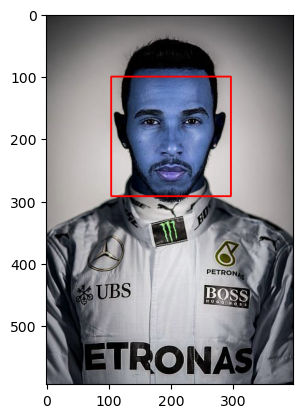

In [148]:
face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

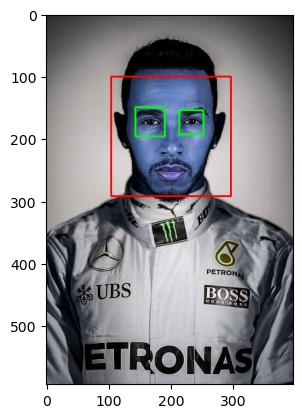

In [149]:
cv.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

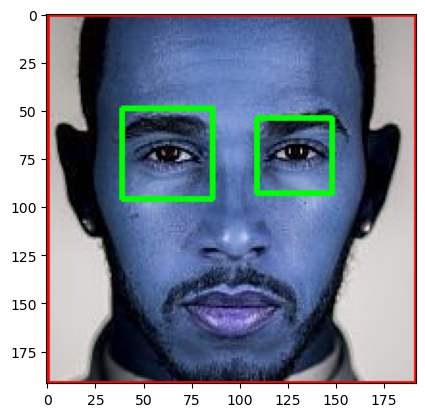

In [150]:
plt.imshow(roi_color,cmap='gray')

In [159]:
def GCI_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.imread(image_path,0)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

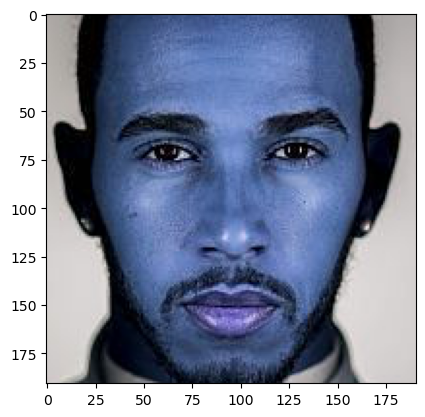

In [160]:
cropped_img=GCI_if_2_eyes('./test_images/lewis_hamilton(1).jpg')
plt.imshow(cropped_img)

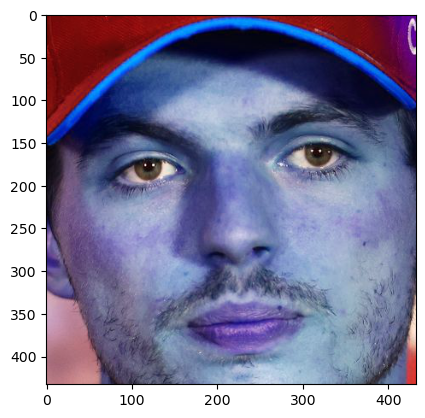

In [161]:
cropped_img=GCI_if_2_eyes('./test_images/max_verstappen(1).jpg')
plt.imshow(cropped_img)

In [180]:
path_to_data = './datasets/'
path_to_cr_data = './datasets/cropped'

In [181]:
import os
img_dir = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)

In [182]:
img_dir

['./datasets/ana_de_armas',
 './datasets/cristiano_ronaldo',
 './datasets/elizabeth_olsen',
 './datasets/lewis_hamilton',
 './datasets/max_verstappen']

In [183]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [200]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
i=0

for dirs in img_dirs:
    count = 1
    celeb_name = dirs.split('/')[-1]
    
    celebrity_file_names_dict[celeb_name] = []
    if i<len(img_dir):
        for entry in os.scandir(img_dir[i]):
            roi_color = GCI_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data +'/'+celeb_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                
                cropped_file_path = cropped_folder + "/" + celeb_name + str(count) + ".png"
            
                cv.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celeb_name].append(cropped_file_path)
                count += 1  
   
    i+=1

Generating cropped images in folder:  ./datasets/cropped/ana_de_armas
Generating cropped images in folder:  ./datasets/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./datasets/cropped/elizabeth_olsen
Generating cropped images in folder:  ./datasets/cropped/lewis_hamilton
Generating cropped images in folder:  ./datasets/cropped/max_verstappen


In [201]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ana_de_armas': ['./datasets/cropped/ana_de_armas\\ana_de_armas1.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas10.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas11.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas12.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas13.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas14.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas15.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas16.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas17.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas18.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas19.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas2.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas20.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas21.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas22.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas23.png',
  './datasets/cropped/ana_de_armas\\ana_de_armas24.png',
  './datasets/cro

In [196]:
cropped_image_dirs

['./datasets/cropped/ana_de_armas',
 './datasets/cropped/cristiano_ronaldo',
 './datasets/cropped/elizabeth_olsen',
 './datasets/cropped/lewis_hamilton',
 './datasets/cropped/max_verstappen']

In [204]:
import pywt  

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [205]:
celeb_name_dict={}
count=0
for i in celebrity_file_names_dict:
    celeb_name_dict[i]=count
    count+=1
celeb_name_dict  

{'ana_de_armas': 0,
 'cristiano_ronaldo': 1,
 'elizabeth_olsen': 2,
 'lewis_hamilton': 3,
 'max_verstappen': 4}

In [210]:
X,y=[],[]
for (celeb_name,training_files) in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv.imread(training_image)
        scaled_img=cv.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celeb_name_dict[celeb_name])

In [216]:
len(X)

160

In [221]:
y[40:50]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [215]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [248]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [249]:
pipe_model=Pipeline([('scaler',MinMaxScaler()),('svc',SVC(kernel='linear',C=100))])
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(C=100, kernel='linear'))])

In [250]:
pipe_model.score(X_test,y_test)

0.725

In [251]:
from sklearn.metrics import classification_report

In [257]:
print(classification_report(y_test,pipe_model.predict(X_test),zero_division=0))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       1.00      0.62      0.77         8
           2       0.75      0.80      0.77        15
           3       0.50      0.75      0.60         4
           4       0.00      0.00      0.00         1

    accuracy                           0.73        40
   macro avg       0.59      0.58      0.57        40
weighted avg       0.74      0.72      0.72        40



In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [304]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [308]:
result=[]
best_estimator={}
for model_name,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    model=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    model.fit(X_train,y_train)
    result.append({
        'model':model_name,
        'best score':model.best_score_,
        'best parameters':model.best_params_
    })
    best_estimator[model_name]=model.best_estimator_

In [310]:
import pandas as pd
df=pd.DataFrame(result,columns=['model','best score','best parameters'])
df

,model,best score,best parameters
0,svm,0.725,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.550,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.675,{'logisticregression__C': 1}


In [313]:
best_estimator

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [316]:
x,y,w=best_estimator['svm'].score(X_test,y_test),best_estimator['random_forest'].score(X_test,y_test),best_estimator['logistic_regression'].score(X_test,y_test)
x,y,w

(0.725, 0.625, 0.7)

In [321]:
best_model=best_estimator['svm']

In [322]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimator['svm'].predict(X_test))
cm

array([[ 9,  0,  1,  2,  0],
       [ 1,  5,  1,  1,  0],
       [ 2,  0, 12,  1,  0],
       [ 1,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

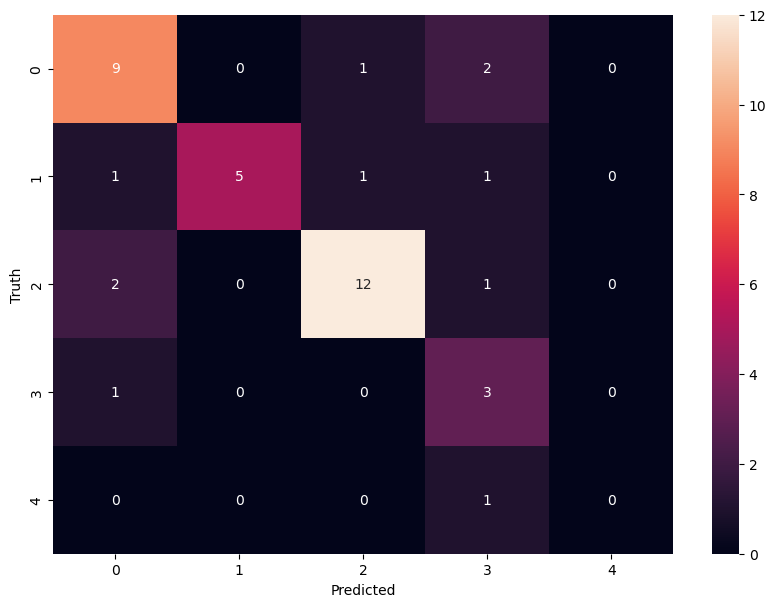

In [323]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [324]:
celeb_name_dict

{'ana_de_armas': 0,
 'cristiano_ronaldo': 1,
 'elizabeth_olsen': 2,
 'lewis_hamilton': 3,
 'max_verstappen': 4}

In [325]:
import sys
!{sys.executable} -m pip install joblib

In [327]:
import joblib
joblib.dump(best_model,'saved_model.pkl')

['saved_model.pkl']

In [328]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(celeb_name_dict))